# LightGBM binary classification on the Higgs dataset with GPU support
Binary classification performed on the [HIGGS dataset](https://archive.ics.uci.edu/ml/datasets/HIGGS) using the LightGBM model. The training is GPU accelerated. This notebook recreates most of the settings from the official [GPU tuning guide](https://lightgbm.readthedocs.io/en/latest/GPU-Performance.html).

## Download HIGGS dataset
The dataset contains 10.5 million records and 28 features. It was produced using Monte Carlo simulations, a computationally expensive procedure. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set. The first column is the class label (1 for signal, 0 for background), followed by the 28 features

In [1]:
!wget -N https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

--2021-10-04 23:01:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2816407858 (2.6G) [application/x-httpd-php]
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz        100%[===================>]   2.62G  23.1MB/s    in 88s     

2021-10-04 23:02:48 (30.5 MB/s) - ‘HIGGS.csv.gz’ saved [2816407858/2816407858]



## LightGBM GPU installation
Command lines for building and installing LightGBM with GPU support. Instructions are adapted from [here](https://www.kaggle.com/kirankunapuli/ieee-fraud-lightgbm-with-gpu).

In [2]:
!git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 23484, done.
remote: Counting objects: 100% (1163/1163), done.
remote: Compressing objects: 100% (621/621), done.
remote: Total 23484 (delta 725), reused 838 (delta 518), pack-reused 22321
Receiving objects: 100% (23484/23484), 18.07 MiB | 30.54 MiB/s, done.
Resolving deltas: 100% (17124/17124), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/opt/notebooks/Awesome-Notebooks/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21733, done.        
remote: Counting objects: 100% (5/5)

In [3]:
!apt-get update
!apt-get install -y -qq libboost-all-dev cmake

Get:1 https://download.docker.com/linux/ubuntu bionic InRelease [64.4 kB]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:3 https://download.docker.com/linux/ubuntu bionic/stable amd64 Packages [23.4 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic InRelease [242 kB]               
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3626 B]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [606 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836

### Build and install LightGBM with GPU support

In [4]:
%%bash
cd LightGBM
mkdir build
cd build
cmake -DUSE_GPU=1 -DOpenCL_LIBRARY=/usr/local/cuda/lib64/libOpenCL.so -DOpenCL_INCLUDE_DIR=/usr/local/cuda/include/ ..
make -j$(nproc)

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - not found
-- Looking for CL_VERSION_2_1
-- Looking for CL_VERSION_2_1 - not found
-- Looking for CL_VERSION_2_0
-- Looking for CL_VERSION_2_0 - not found
-- Looking for CL_VERSION_1_2
-- Looking

In [5]:
!cd LightGBM/python-package/;python setup.py install --precompile

running install
running build
running build_py
creating build
creating build/lib
creating build/lib/lightgbm
copying lightgbm/__init__.py -> build/lib/lightgbm
copying lightgbm/basic.py -> build/lib/lightgbm
copying lightgbm/callback.py -> build/lib/lightgbm
copying lightgbm/compat.py -> build/lib/lightgbm
copying lightgbm/dask.py -> build/lib/lightgbm
copying lightgbm/engine.py -> build/lib/lightgbm
copying lightgbm/libpath.py -> build/lib/lightgbm
copying lightgbm/plotting.py -> build/lib/lightgbm
copying lightgbm/sklearn.py -> build/lib/lightgbm
running egg_info
creating lightgbm.egg-info
writing lightgbm.egg-info/PKG-INFO
writing dependency_links to lightgbm.egg-info/dependency_links.txt
writing requirements to lightgbm.egg-info/requires.txt
writing top-level names to lightgbm.egg-info/top_level.txt
writing manifest file 'lightgbm.egg-info/SOURCES.txt'
reading manifest file 'lightgbm.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
no previously-included directories fo

In [6]:
# This line is VERY important. It seems to be responsible for enabling OpenCL support
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd
!rm -r LightGBM

## Install and import Python packages

In [7]:
!pip install -q scikit-learn
!pip install -q pandas

In [8]:
from lightgbm import LGBMClassifier, plot_importance
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

## Load the HIGGS dataset into a pandas dataframe and split into train/test sets

In [10]:
higgs = pd.read_csv('HIGGS.csv.gz', delimiter=',', header=None)
higgs.columns = ['label',
                 'lepton pT',
                 'lepton eta',
                 'lepton phi',
                 'missing energy magnitude',
                 'missing energy phi',
                 'jet 1 pt',
                 'jet 1 eta',
                 'jet 1 phi',
                 'jet 1 b-tag',
                 'jet 2 pt',
                 'jet 2 eta',
                 'jet 2 phi',
                 'jet 2 b-tag',
                 'jet 3 pt',
                 'jet 3 eta',
                 'jet 3 phi',
                 'jet 3 b-tag',
                 'jet 4 pt',
                 'jet 4 eta',
                 'jet 4 phi',
                 'jet 4 b-tag',
                 'm_jj',
                 'm_jjj',
                 'm_lv',
                 'm_jlv',
                 'm_bb',
                 'm_wbb',
                 'm_wwbb']

In [11]:
# view summary of dataset
higgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
label                       float64
lepton pT                   float64
lepton eta                  float64
lepton phi                  float64
missing energy magnitude    float64
missing energy phi          float64
jet 1 pt                    float64
jet 1 eta                   float64
jet 1 phi                   float64
jet 1 b-tag                 float64
jet 2 pt                    float64
jet 2 eta                   float64
jet 2 phi                   float64
jet 2 b-tag                 float64
jet 3 pt                    float64
jet 3 eta                   float64
jet 3 phi                   float64
jet 3 b-tag                 float64
jet 4 pt                    float64
jet 4 eta                   float64
jet 4 phi                   float64
jet 4 b-tag                 float64
m_jj                        float64
m_jjj                       float64
m_lv                 

In [12]:
higgs

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999995,1.0,1.159912,1.013847,0.108615,1.495524,-0.537545,2.342396,-0.839740,1.320683,0.000000,...,-0.097068,1.190680,3.101961,0.822136,0.766772,1.002191,1.061233,0.837004,0.860472,0.772484
10999996,1.0,0.618388,-1.012982,1.110139,0.941023,-0.379199,1.004656,0.348535,-1.678593,2.173076,...,-0.216995,1.049177,3.101961,0.826829,0.989809,1.029104,1.199679,0.891481,0.938490,0.865269
10999997,1.0,0.700559,0.774251,1.520182,0.847112,0.211230,1.095531,0.052457,0.024553,2.173076,...,1.585235,1.713962,0.000000,0.337374,0.845208,0.987610,0.883422,1.888438,1.153766,0.931279
10999998,0.0,1.178030,0.117796,-1.276980,1.864457,-0.584370,0.998519,-1.264549,1.276333,0.000000,...,1.399515,-1.313189,0.000000,0.838842,0.882890,1.201380,0.939216,0.339705,0.759070,0.719119


In [13]:
X = higgs.iloc[:, 1:]
y = higgs.iloc[:, 0]

X_train = X[:-500000]
y_train = y[:-500000]

X_test = X[-500000:]
y_test = y[-500000:]

## LightGBM Model Development and Training

In [14]:
clf = LGBMClassifier(
    max_bin = 63,
    num_leaves = 255,
    num_iterations = 500,
    learning_rate = 0.1,
    tree_learner = 'serial',
    task = 'train',
    is_training_metric = False,
    min_data_in_leaf = 1,
    min_sum_hessian_in_leaf = 100,
    ndcg_eval_at = [1,3,5,10],
    device = 'gpu',
    gpu_platform_id = 0,
    gpu_device_id = 0,
    num_thread = 28,
    seed = 69420
    )

In [16]:
clf.fit(X_train, y_train, eval_set=(X_test, y_test), eval_metric='auc')

/opt/conda/lib/python3.6/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[1]	valid_0's auc: 0.771871	valid_0's binary_logloss: 0.670266
[2]	valid_0's auc: 0.778275	valid_0's binary_logloss: 0.652803
[3]	valid_0's auc: 0.781247	valid_0's binary_logloss: 0.638149
[4]	valid_0's auc: 0.783968	valid_0's binary_logloss: 0.625659
[5]	valid_0's auc: 0.786274	valid_0's binary_logloss: 0.614859
[6]	valid_0's auc: 0.788084	valid_0's binary_logloss: 0.60554
[7]	valid_0's auc: 0.789762	valid_0's binary_logloss: 0.59748
[8]	valid_0's auc: 0.791212	valid_0's binary_logloss: 0.590398
[9]	valid_0's auc: 0.792713	valid_0's binary_logloss: 0.584196
[10]	valid_0's auc: 0.794166	valid_0's binary_logloss: 0.578654
[11]	valid_0's auc: 0.795473	valid_0's binary_logloss: 0.573734
[12]	valid_0's auc: 0.796821	valid_0's binary_logloss: 0.569243
[13]	valid_0's auc: 0.797954	valid_0's binary_logloss: 0.565361
[14]	valid_0's auc: 0.79887	valid_0's binary_logloss: 0.561929
[15]	valid_0's auc: 0.80013	valid_0's binary_logloss: 0.558581
[16]	valid_0's auc: 0.801089	valid_0's binary_logloss

LGBMClassifier(device='gpu', gpu_device_id=0, gpu_platform_id=0,
               is_training_metric=False, max_bin=63, min_data_in_leaf=1,
               min_sum_hessian_in_leaf=100, ndcg_eval_at=[1, 3, 5, 10],
               num_iterations=500, num_leaves=255, num_thread=28, seed=69420,
               task='train', tree_learner='serial')

## Model prediction and evaluation

In [17]:
y_pred = clf.predict(X_test, raw_score=True)

In [18]:
auroc = roc_auc_score(y_test, y_pred)
print('LightGBM Model auROC score: {0:0.4f}'.format(auroc))

LightGBM Model auROC score: 0.8455


## Plot feature importance

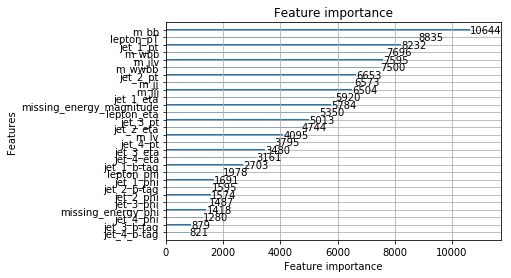

In [19]:
plot_importance(clf)